In [1]:
# with Linear Regression and Random Forest Regressor to make predictions based on board games information (Average Review)

In [2]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)


3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
0.24.2
1.5.3
0.9.0
0.18


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [4]:
#Load the data
games = pandas.read_csv("games.csv")

In [5]:
#print the names of the columns in Games
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [6]:
#print the shape of the data set to know the number of rows and columns
print(games.shape)

(81312, 20)


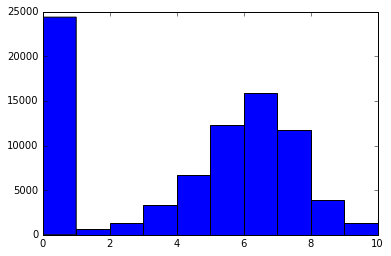

In [7]:
# We are goinf to predict average rating based on the other characteristics of the game
# AVerage weight is the function of the complexity of the game higher weight - more complex (important for final prediction)
# Plot Histogram
# Plot a Histogram of all the ratings in the average_rating column
plt.hist(games["average_rating"])
plt.show()
# The average rating is zero for almost 24,000 games
# WE have lots of zero and the rest is skewed to the right with the averaage prediction of 6

In [8]:
# Print the all the rows in the dataset where the average_rating is zero
games[games["average_rating"] == 0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0
13127,962,boardgame,Contango,2000.0,2.0,6.0,90.0,90.0,90.0,10.0,0,0.0,0.0,0,0,0,2,1,0,0.0
13169,1097,boardgame,Don't Give Up Your Day Job!,2000.0,6.0,41.0,120.0,120.0,120.0,8.0,0,0.0,0.0,0,0,0,2,0,0,0.0
13180,1151,boardgame,"Money, Power, Respect",2000.0,2.0,6.0,90.0,90.0,90.0,8.0,0,0.0,0.0,1,0,0,2,0,0,0.0
13181,1154,boardgame,Nuts! To You,1987.0,2.0,2.0,20.0,20.0,20.0,6.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13188,1180,boardgame,Tower of Babylon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,5,0,2,2,0,0,0.0


In [9]:
# pick the first row in the games dataeset where the average rating is zero
games[games["average_rating"] == 0].iloc[0] 
# “iloc” in pandas is used to select rows and columns by number, in the order that they appear in the data frame. 
# You can imagine that each row has a row number from 0 to the total rows (data.shape[0])  and iloc[] allows selections based on these numbers. The same applies for columns (ranging from 0 to data.shape[1] )
# From the below data it is clear that the game is nerver published and it has only one wisher and no other significant data

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

In [10]:
# Print the first row in the games where the average_Rating is greater than zero
games[games["average_rating"] > 0].iloc[0]
# The game Twilight Struggle was published in the year 2005 with the average rating of 8.33 with 20113 number of ratings

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object

(56932, 20)
(56894, 20)


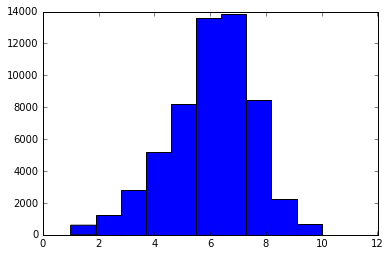

In [11]:
# We want games where the user reviewed the games
# Remove any rows without user reviews
games = games[games['average_rating'] > 0]

# get the shape after removing zero ratings
print(games.shape)

# Remove any rows with missing values
games = games.dropna(axis = 0) # 0, or ‘index’ : Drop rows which contain missing values.
 
# Get the shape after removing na rows
print(games.shape)

# Make a hsitogram of all the average_review rating now
plt.hist(games["average_rating"])
plt.show()

In [12]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


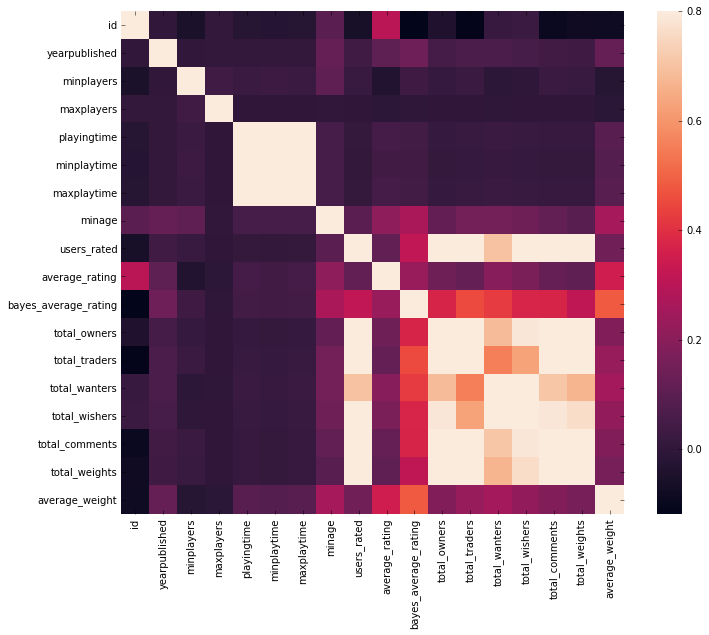

In [13]:
#Correlation Matrix to find the correlation between features in our dataset
corrmat = games.corr() #Compute pairwise correlation of columns, excluding NA/null values.
fig = plt.figure(figsize = (12,9)) #Create a new figure. fig size in width, height in inches

sns.heatmap(corrmat, vmax = .8, square = True) # Plot rectangular data as a color-encoded matrix
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.show()

#playing time, min playing time , max playing time are highly correlated
# id & average_rating,average_weight & average_rating are correlated
# https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/

In [14]:
corrmat

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
id,1.000000,0.002767,-0.050234,0.006141,-0.022017,-0.026729,-0.022017,0.099168,-0.057778,0.304201,-0.117172,-0.040308,-0.112069,0.017463,0.024777,-0.089659,-0.078830,-0.082301
yearpublished,0.002767,1.000000,0.004308,0.004977,0.006235,0.005245,0.006235,0.125281,0.037454,0.108461,0.140998,0.047740,0.064403,0.062289,0.052534,0.043818,0.036226,0.125318
minplayers,-0.050234,0.004308,1.000000,0.037155,0.024320,0.026569,0.024320,0.110886,0.020364,-0.032701,0.034915,0.014594,0.024708,-0.008654,-0.003786,0.023033,0.019061,-0.021892
maxplayers,0.006141,0.004977,0.037155,1.000000,-0.001020,-0.000950,-0.001020,0.004508,-0.000858,-0.008335,-0.003437,-0.000977,-0.002381,-0.003585,-0.002499,-0.001502,-0.001457,-0.013448
playingtime,-0.022017,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minplaytime,-0.026729,0.005245,0.026569,-0.000950,0.967909,1.000000,0.967909,0.052454,0.005502,0.043985,0.041845,0.008975,0.014484,0.017491,0.012737,0.010046,0.010172,0.084405
maxplaytime,-0.022017,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minage,0.099168,0.125281,0.110886,0.004508,0.053471,0.052454,0.053471,1.000000,0.097885,0.210049,0.266937,0.118564,0.152313,0.154097,0.137476,0.113395,0.097084,0.259782
users_rated,-0.057778,0.037454,0.020364,-0.000858,0.010908,0.005502,0.010908,0.097885,1.000000,0.112564,0.317992,0.977664,0.807873,0.702433,0.805116,0.978708,0.975723,0.150597
average_rating,0.304201,0.108461,-0.032701,-0.008335,0.048994,0.043985,0.048994,0.210049,0.112564,1.000000,0.231563,0.137478,0.119452,0.196566,0.171375,0.123714,0.109691,0.351081


In [15]:
# Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
#       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
#      'average_rating', 'bayes_average_rating', 'total_owners',
#      'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
#      'total_weights', 'average_weight'],
#     dtype='object')
# Get all the columns from the dataframe
columns = games.columns.tolist()

# Filter the columns to remove the data we don't want - retain only the columns needed for prediction
columns = [c for c in columns if c not in ['id','type','name','average_rating','bayes_average_rating']]

#Store the variable we will be predicting on
target = 'average_rating'

In [16]:
# Generate training and test dataset
from sklearn.model_selection import train_test_split

# Generate training set
train = games.sample(frac = 0.8, random_state = 1) # Return a random sample of items from an axis of object.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

# Select anything not in the training set and put it in the test set
test = games.loc[~games.index.isin(train.index)]

#Print shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [17]:
games.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            81254, 81255, 81256, 81257, 81258, 81260, 81261, 81263, 81278,
            81279],
           dtype='int64', length=56894)

In [18]:
train.index

Int64Index([ 2602,  9023, 13467, 16387, 21392, 68903, 48968, 33009, 27026,
            69494,
            ...
            16606, 14279, 22591, 49116, 44147, 19692, 66233, 51379, 11711,
            30334],
           dtype='int64', length=45515)

In [19]:
games.index.isin(train.index)

array([ True,  True,  True, ...,  True, False, False])

In [20]:
~games.index.isin(train.index)

array([False, False, False, ..., False,  True,  True])

In [21]:
games[~games.index.isin(train.index)]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
9,72125,boardgame,Eclipse,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359
14,35677,boardgame,Le Havre,2008.0,1.0,5.0,200.0,100.0,200.0,12.0,15774,7.99115,7.88172,16429,205,1343,5149,3458,1450,3.7531
15,28720,boardgame,Brass,2007.0,3.0,4.0,180.0,120.0,180.0,13.0,8785,8.03071,7.85824,9171,149,798,2858,2259,1012,3.8646
18,68448,boardgame,7 Wonders,2010.0,2.0,7.0,30.0,30.0,30.0,10.0,36732,7.87047,7.79413,44982,464,1046,5806,7126,2917,2.3384
20,122515,boardgame,Keyflower,2012.0,2.0,6.0,120.0,90.0,120.0,12.0,6753,7.98786,7.74780,8599,78,1017,3197,1442,517,3.3056
27,110327,boardgame,Lords of Waterdeep,2012.0,2.0,5.0,60.0,60.0,60.0,12.0,19864,7.82181,7.70704,24419,257,995,4706,3898,1493,2.5177
39,132531,boardgame,Roll for the Galaxy,2014.0,2.0,5.0,45.0,45.0,45.0,13.0,4632,7.92585,7.59572,6551,51,960,3269,912,348,2.6667
41,144733,boardgame,Russian Railroads,2013.0,2.0,4.0,120.0,90.0,120.0,12.0,5383,7.85790,7.58423,6134,86,614,1932,1063,470,3.4043
42,126042,boardgame,Nations,2013.0,1.0,5.0,200.0,40.0,200.0,14.0,5546,7.86088,7.58360,6457,145,678,2413,1129,489,3.4949
47,70149,boardgame,Ora et Labora,2011.0,1.0,4.0,150.0,150.0,150.0,13.0,6054,7.81642,7.57172,6995,121,902,2772,1225,516,3.8953


In [22]:
games.loc[~games.index.isin(train.index)]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
9,72125,boardgame,Eclipse,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359
14,35677,boardgame,Le Havre,2008.0,1.0,5.0,200.0,100.0,200.0,12.0,15774,7.99115,7.88172,16429,205,1343,5149,3458,1450,3.7531
15,28720,boardgame,Brass,2007.0,3.0,4.0,180.0,120.0,180.0,13.0,8785,8.03071,7.85824,9171,149,798,2858,2259,1012,3.8646
18,68448,boardgame,7 Wonders,2010.0,2.0,7.0,30.0,30.0,30.0,10.0,36732,7.87047,7.79413,44982,464,1046,5806,7126,2917,2.3384
20,122515,boardgame,Keyflower,2012.0,2.0,6.0,120.0,90.0,120.0,12.0,6753,7.98786,7.74780,8599,78,1017,3197,1442,517,3.3056
27,110327,boardgame,Lords of Waterdeep,2012.0,2.0,5.0,60.0,60.0,60.0,12.0,19864,7.82181,7.70704,24419,257,995,4706,3898,1493,2.5177
39,132531,boardgame,Roll for the Galaxy,2014.0,2.0,5.0,45.0,45.0,45.0,13.0,4632,7.92585,7.59572,6551,51,960,3269,912,348,2.6667
41,144733,boardgame,Russian Railroads,2013.0,2.0,4.0,120.0,90.0,120.0,12.0,5383,7.85790,7.58423,6134,86,614,1932,1063,470,3.4043
42,126042,boardgame,Nations,2013.0,1.0,5.0,200.0,40.0,200.0,14.0,5546,7.86088,7.58360,6457,145,678,2413,1129,489,3.4949
47,70149,boardgame,Ora et Labora,2011.0,1.0,4.0,150.0,150.0,150.0,13.0,6054,7.81642,7.57172,6995,121,902,2772,1225,516,3.8953


In [23]:
# Import Linear Regressor model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model selection
LR = LinearRegression()

# Fit the model to the training data
LR.fit(train[columns],train[target])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# Generate predictions for the test set
predictions = LR.predict(test[columns])

# Compute error between our test predictions and actual values
mean_squared_error(predictions, test[target])

2.0788190326293243

In [26]:
# This data is fairly complex to fit into a linear model perfectly
# For Average Rating, there is no feature that indicates a strong linear relationship, so linear model may not be a perfect fit
# for our data
# https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a
# https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

# Random Forst Regressor is a good choice for non-linear models

# Import the Random Forest model
from sklearn.ensemble import RandomForestRegressor

# Initialise the model
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1) 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

# Fit to the data
RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [27]:
# make predictions 
predictions = RFR.predict(test[columns])

# Compute the error between our test prediction and actual values
mean_squared_error(predictions, test[target])

1.4458564605687358

In [37]:
# Check the prediction values for a single test column
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [38]:
# Make predictions with both the models
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

# Print out the predictions
print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [39]:
# Actual rating for that particular baord game
print(test[target].iloc[0])

8.07933


In [ ]:
#Pretty close !!!!